# Udacity DataScience Blog Project
## To Complete this project i used StackOverFlow Developer Survey 2019

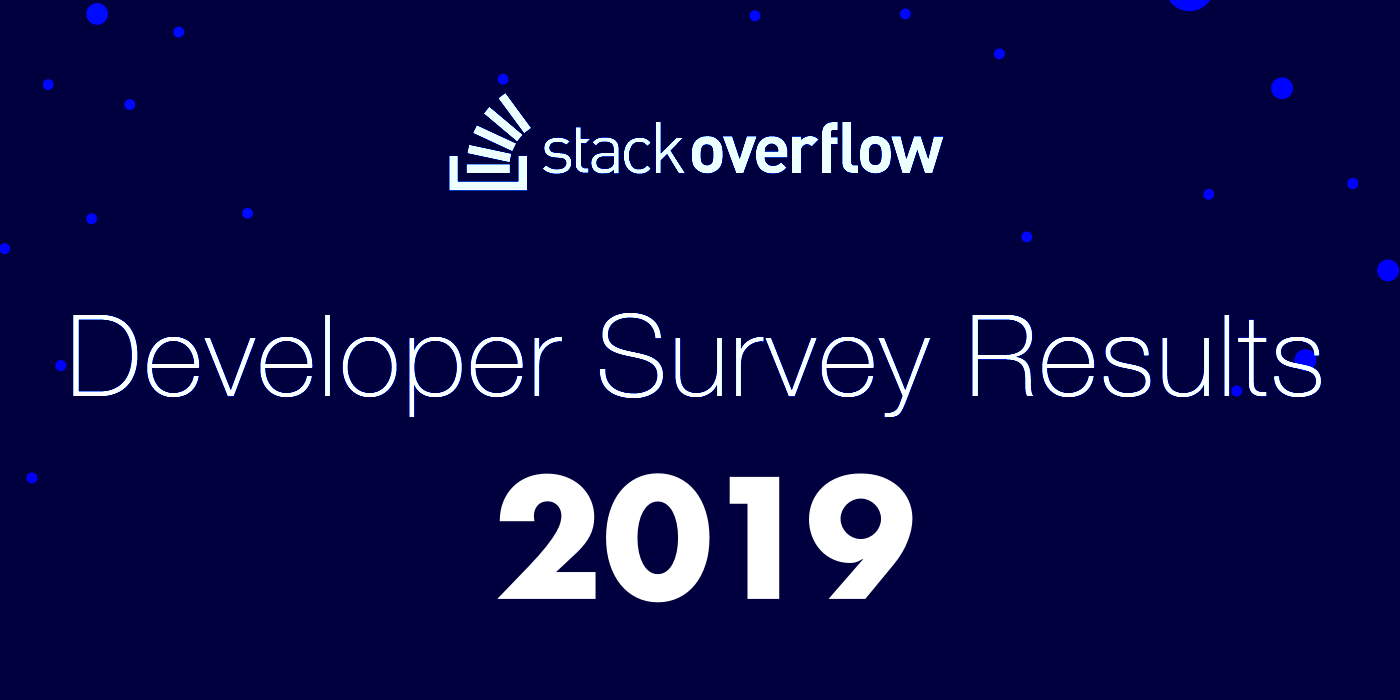

In [2]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='StackOverflows-developer-survey-results-for-2019.png')
display(x)

### I have few questions 
#### 1. Which Programming Language is most voted by developers in 2019
#### 2. Which Programming Language is most voted by developers in India in 2019
#### 3. Which development platform is most popular among developers in 2019
#### 4. Which development platform is most popular among developers in India in 2019

## 1. Which Programming Language is most voted by developers in 2019

In [27]:
#import all neccesary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [28]:
#read csv file.
#Click on the link 'https://insights.stackoverflow.com/survey' and download 'View Survey Results • Download Full Data Set (CSV)'
# upload the csv file to jupyter notebook
df = pd.read_csv('survey_results_public.csv')

In [29]:
# create 'new_df' from 'df' because to know the popularity we need only two columns 
new_df = df[['LanguageWorkedWith','LanguageDesireNextYear']]

In [30]:
#drop all rows with which has no values
new_df = new_df.dropna()

In [31]:
# Split each row elements with ';' because each row has element like [c;python;java;javascript]
# it will give a list of elements which have programming language name
new_df['languageWorkedWith'] = new_df.LanguageWorkedWith.str.split(';')
new_df['languageDesireNextYear'] = new_df.LanguageDesireNextYear.str.split(';')

In [32]:
# convert array list into an array
def disarray(array_list):
    objects = []
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

list_languageWorkedWith = disarray(new_df['languageWorkedWith'])
list_languageDesireNextYear = disarray(new_df['languageDesireNextYear'])

In [33]:
# count the number of different elements using Counter() the convert that result into python dictionary 
# example dictionary  -->   {key: python,count : 60}
#convert that dictionary into dataframe
# add both dataframes
df2 = pd.DataFrame([dict(Counter(list_languageWorkedWith))])
df1 = pd.DataFrame([dict(Counter(list_languageDesireNextYear))])
final_df = df2.append(df1)

In [34]:
# reset the index of the dataframe
final_df.reset_index(drop=True,inplace=True)

In [35]:
# count the values of dataframe and then sort values according to number of counts
final_df_sort = final_df.sum().sort_values()

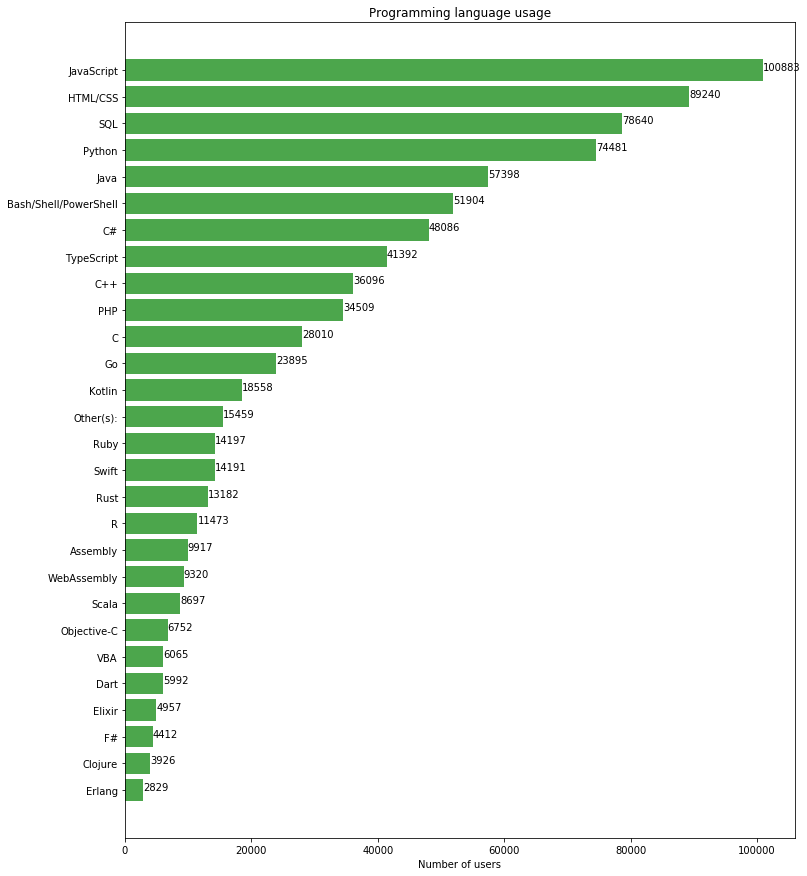

In [36]:
# Plot the final result using matplotlib
y_pos = final_df_sort.index
performance = final_df_sort
plt.figure(figsize=(12,15))
plt.barh(y_pos, performance, align='center',color='green', alpha=0.7)
plt.xlabel('Number of users')
plt.title('Programming language usage')
# adding number of counts on each bar
for index, value in enumerate(performance):
    plt.text(value, index, str(value))
plt.show()

## 2. Which Programming Language is most voted by developers in India in 2019

In this question we want result according to 'India'. SO we first slice dataframe with contry column and store only those values which has country name == 'India'. 

In [37]:
# slice according to country name 'India'
df_india = df[df.Country == 'India']

In [38]:
# now slice new dataframe according to coulmns which are needed to find the result
new_df_india = df_india[['LanguageWorkedWith','LanguageDesireNextYear']]

In [39]:
# drop all rows which has no values 
# this will show a warning message that we are changing the existing file of notebook because 
# we are seting 'inplace' argument to 'True' this will perform all changing in the file itself.
# if we are using inplace=True then there is no need to create a variable to store the result.
new_df_india.dropna(inplace=True)

C:\Users\07ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
# Split each row elements with ';' because each row has element like [c;python;java;javascript]
# it will give a list of elements which have programming language name
new_df_india['languageWorkedWith'] = new_df_india['LanguageWorkedWith'].str.split(';')
new_df_india['languageDesireNextYear'] = new_df_india['LanguageDesireNextYear'].str.split(';')

C:\Users\07ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\07ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
# convert the list into array by using disaray() method which is already defined previously
list_india_languageWorkedWith = disarray(new_df_india['languageWorkedWith'])
list_india_languageDesireNextYear = disarray(new_df_india['languageDesireNextYear'])

In [42]:
# count the number of different elements using Counter() the convert that result into python dictionary 
# example dictionary  -->   {key: python,count : 60}
#convert that dictionary into dataframe
# add both dataframes
df2 = pd.DataFrame([dict(Counter(list_india_languageWorkedWith))])
df1 = pd.DataFrame([dict(Counter(list_india_languageDesireNextYear))])
final_df_india = df2.append(df1)

In [43]:
# count the values and sort them according to count
final_df_sort_india = final_df_india.sum().sort_values()

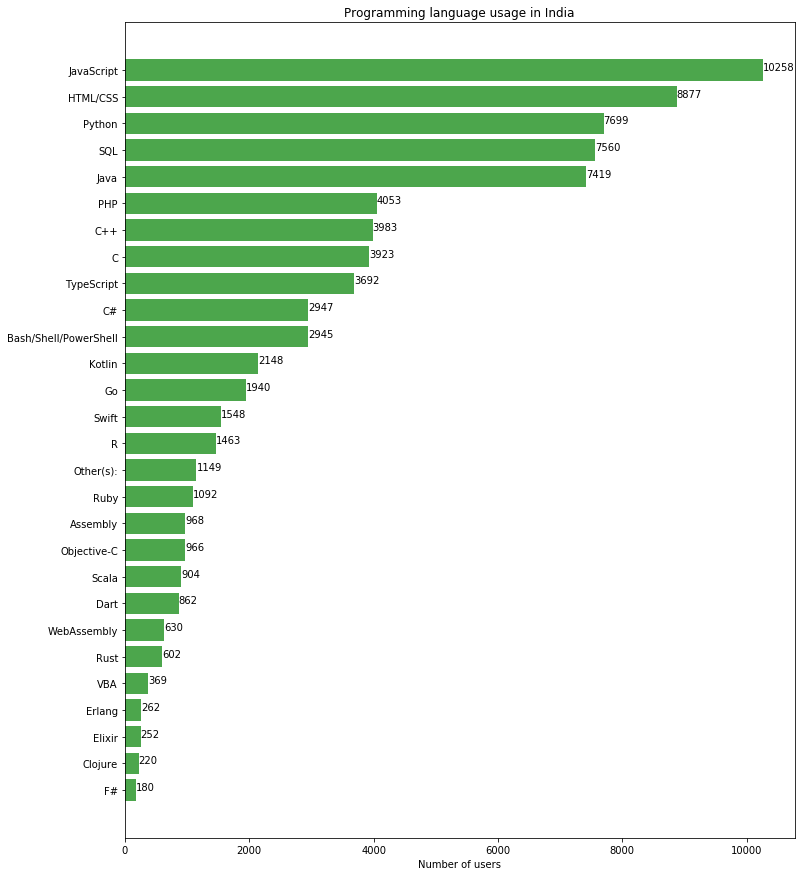

In [44]:
# plot the graph using matplotlib
y_pos = final_df_sort_india.index
performance = final_df_sort_india
plt.figure(figsize=(12,15)) 
plt.barh(y_pos, performance, align='center',color='green', alpha=0.7)
plt.xlabel('Number of users')
plt.title('Programming language usage in India')
# adding count on each bar of the plot
for index, value in enumerate(performance):
    plt.text(value, index, str(value))
plt.show()

## 3.Which development platform is most popular among developers in 2019

In [45]:
# slice according to 'DevEnviron' column
df_plat = df[['DevEnviron']]

In [46]:
# remove all null values
df_plat.dropna(inplace=True)

C:\Users\07ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
# Split each row elements with ';' because each row has element like [c;python;java;javascript]
# it will give a list of elements which have programming language name
df_plat['devEnviron'] = df_plat.DevEnviron.str.split(';')

C:\Users\07ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
# convert the list into array by using disaray() method which is already defined previously
new_df_plat = disarray(df_plat['devEnviron'])

In [49]:
# count the values of the array and then convert it into the python dictionary 
# convert the python dictionary into dataframe
final_new_df_plat = pd.DataFrame([dict(Counter(new_df_plat))])

In [50]:
# count the values and sort the dataframe according to count
final_sort = final_new_df_plat.sum().sort_values()

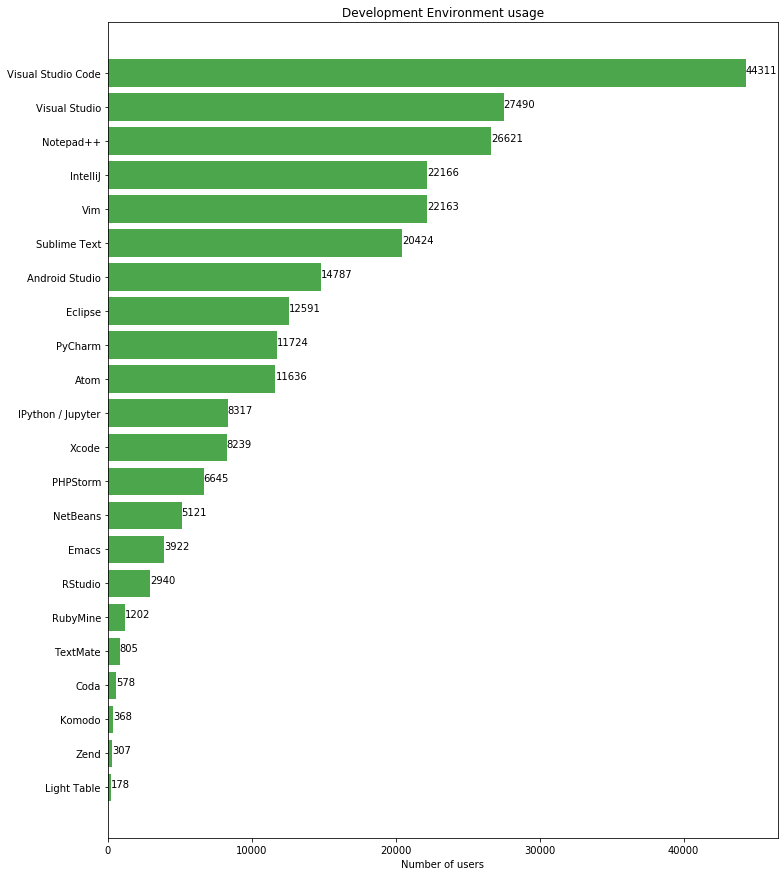

In [51]:
# Plot the graph using matplotlib
y_pos = final_sort.index
performance = final_sort
plt.figure(figsize=(12,15)) 
plt.barh(y_pos, performance, align='center',color='green', alpha=0.7)
plt.xlabel('Number of users')
plt.title('Development Environment usage')
# adding count on each bar of the plot
for index, value in enumerate(performance):
    plt.text(value, index, str(value))
plt.show()

## 4. Which development platform is most popular among developers in India in 2019

In this i used the previous dataframe where i sliced the dataframe with the country name 'India'

In [52]:
# slice according to development environment
df_india_plat = df_india[['DevEnviron']] 

In [53]:
# remove all null values
df_india_plat.dropna(inplace=True)

C:\Users\07ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
# Split each row elements with ';' because each row has element like [c;python;java;javascript]
# it will give a list of elements which have programming language name
df_india_plat['devEnviron'] = df_india_plat['DevEnviron'].str.split(';')

C:\Users\07ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
# convert the list into array using disarray method which is already defined in question number 1
new_df_india_plat = disarray(df_india_plat['devEnviron'])

In [56]:
# count the values of the array and then convert it into the python dictionary 
# convert the python dictionary into dataframe
final_df_india_plat = pd.DataFrame([dict(Counter(new_df_india_plat))])

In [57]:
# count the occurance of all values and sort them according to count
final_df_india_plat_sort = final_df_india_plat.sum().sort_values()

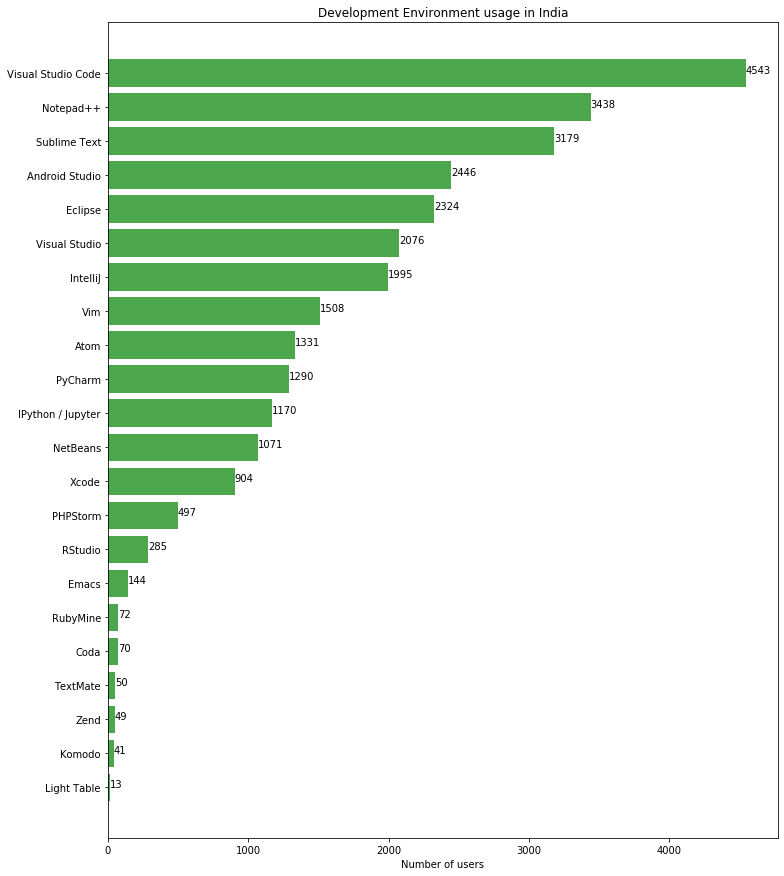

In [58]:
# Plot the graph using matplotlib
y_pos = final_df_india_plat_sort.index
performance = final_df_india_plat_sort
plt.figure(figsize=(12,15)) 
plt.barh(y_pos,performance,align='center',color='green',alpha=0.7)
plt.xlabel('Number of users')
plt.title('Development Environment usage in India')
# Adding the count on each bar of the plot
for index, value in enumerate(performance):
    plt.text(value, index, str(value))
plt.show()

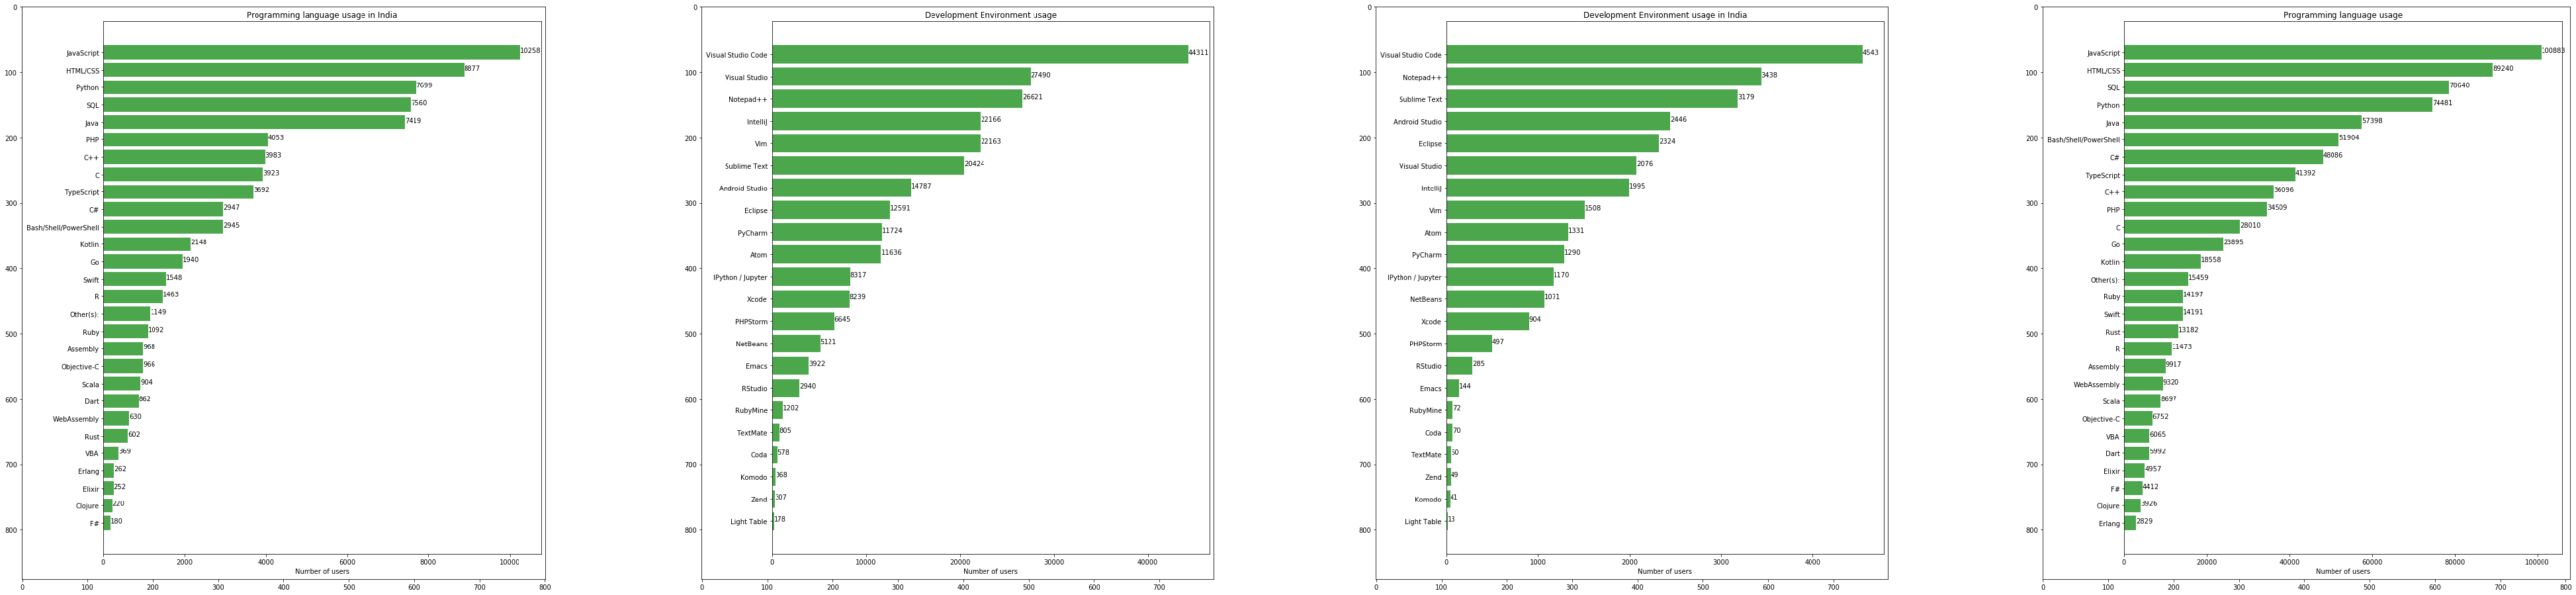

In [11]:
# if you want to see all graphs together for better comparision
# Double click on below graph
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('images/*.png'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(70,35))
columns = 4
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)